## Membaca dataset

Mengabungkan dataset dari bulan januari sampai desember menjadi 1 dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

dataset_jan = pd.read_csv('januari-2019-data-kecepatan-rata-rata-di-41-koridor-jalan-utama-pada-jam-sibuk.csv')
dataset_feb = pd.read_csv('februari-2019-data-kecepatan-rata-rata-di-41-koridor-jalan-utama-pada-jam-sibuk.csv')
dataset_mar = pd.read_csv('maret-2019-data-kecepatan-rata-rata-di-41-koridor-jalan-utama-pada-jam-sibuk.csv')
dataset_apr = pd.read_csv('april-2019-data-kecepatan-rata-rata-di-41-koridor-jalan-utama-pada-jam-sibuk.csv')
dataset_mei = pd.read_csv('mei-2019-data-kecepatan-rata-rata-di-41-koridor-jalan-utama-pada-jam-sibuk.csv')
dataset_jun = pd.read_csv('juni-2019-data-kecepatan-rata-rata-di-41-koridor-jalan-utama-pada-jam-sibuk.csv')
dataset_jul = pd.read_csv('juli-2019-data-kecepatan-rata-rata-di-41-koridor-jalan-utama-pada-jam-sibuk.csv')
dataset_agu = pd.read_csv('agustus-2019-data-kecepatan-rata-rata-di-41-koridor-jalan-utama-pada-jam-sibuk.csv')
dataset_sep = pd.read_csv('september-2019-data-kecepatan-rata-rata-di-41-koridor-jalan-utama-pada-jam-sibuk.csv')
dataset_okt = pd.read_csv('oktober-2019-data-kecepatan-rata-rata-di-41-koridor-jalan-utama-pada-jam-sibuk.csv')
dataset_nov = pd.read_csv('november-2019-data-kecepatan-rata-rata-di-41-koridor-jalan-utama-pada-jam-sibuk.csv')
dataset_des = pd.read_csv('desember-2019-data-kecepatan-rata-rata-di-41-koridor-jalan-utama-pada-jam-sibuk.csv')
all_datasets = [dataset_jan, dataset_feb, dataset_mar, dataset_apr, dataset_mei, dataset_jun, dataset_jul, dataset_agu, dataset_sep, dataset_okt, dataset_nov, dataset_des]
dataset = pd.concat(all_datasets, ignore_index=True)
dataset

waktu             arah                                            koridor  \
0    pagi  Selatan - Pusat  Lenteng Agung - Ps. Minggu - Supomo - dr. Saha...   
1    pagi  Selatan - Pusat  Cilandak KKO - Warung Buncit - Mampang Prapata...   
2    pagi  Selatan - Pusat  Pangeran Antasari - Prapanca - Iskandarsyah - ...   
3    pagi  Selatan - Pusat  Pondok Labu - Fatmawati - Panglima Polim - Sis...   
4    pagi  Selatan - Pusat  Pasar Jumat - Metro Pondok Indah - Iskandar Mu...   
..    ...              ...                                                ...   
981  Sore    Pusat - Utara  Letjend. Suprapto - Yos Sudarso - Bollevard Ba...   
982  Sore    Pusat - Barat  Hayam Wuruk - Hasyim Ashari - Kyai Tapa - Daan...   
983  Sore    Pusat - Barat  Hayam Wuruk - Balikpapan - Tomang Raya - S. Pa...   
984  Sore    Pusat - Barat  Kebon Sirih - Jatibaru - Katamso - Kemanggisan...   
985  Sore    Pusat - Barat  Kebon Sirih - Jatibaru - Katamso - Kemanggisan...   

     target_kecepatan  jarak  target_waktu_tempuh  \
0                20.5  19.62                57.43   
1                20.5  13.36                39.10   
2                20.5  11.13                32.58   
3                20.5  16.25                47.56   
4                20.5  15.87                46.45   
..                ...    ...                  ...   
981              23.0  20.29                52.93   
982              23.0  14.47                37.75   
983              23.0  15.55                40.57   
984              23.0  17.43                45.47   
985              23.0  16.23                42.34   

     pencapaian_kecepatan_per_koridor  pencapaian_kecepatan  \
0                               22.70                 22.98   
1                               25.43                 22.98   
2                               27.54                 22.98   
3                               22.20                 22.98   
4                               25.99                 22.98   
..                                ...                   ...   
981                             21.16                 22.49   
982                             20.72                 21.67   
983                             18.11                 21.67   
984                             24.61                 21.67   
985                             23.22                 21.67   

     pencapaian_waktu_tempuh  
0                      63.83  
1                      37.71  
2                      26.99  
3                      50.82  
4                      42.06  
..                       ...  
981                    58.65  
982                    46.75  
983                    54.13  
984                    50.71  
985                    48.24  

[986 rows x 9 columns]

## Pembersihan data dan pengerjaan tugas pertama

Mengecek berapa banyak data NaN di 1 dataset yang sudah digabungkan.

In [2]:
nan_indices = dataset.index[dataset.isna().any(1)]
dataset.loc[nan_indices]

waktu             arah                                            koridor  \
287  sore  Selatan - Pusat  Lenteng Agung - Ps. Minggu - Supomo - dr. Saha...   
288  sore  Selatan - Pusat  Cilandak KKO - Warung Buncit - Mampang Prapata...   
289  sore  Selatan - Pusat  Pangeran Antasari - Prapanca - Iskandarsyah - ...   
290  sore  Selatan - Pusat  Pondok Labu - Fatmawati - Panglima Polim - Sis...   
291  sore  Selatan - Pusat  Pasar Jumat - Metro Pondok Indah - Iskandar Mu...   
292  sore  Selatan - Pusat  Ciledug Raya - Keb Lama - Pakubuwono 6 - Hang ...   
293  sore  Selatan - Pusat  Raya Ciputat - Tanah Kusir - Bungur - Iskandar...   
294  sore    Timur - Pusat  Raya Bekasi - Perintis Kemerdekaan - Letjend. ...   
295  sore    Timur - Pusat  Raya Bekasi - Pemuda - Pramuka - Proklamasi - ...   
296  sore    Timur - Pusat  I Gusti Ngurah Rai - Jatinegara Barat - Matram...   
297  sore    Timur - Pusat  Kalimalang - Basuki Rahmat - Kampung Melayu - ...   
298  sore    Timur - Pusat  Pondok Kopi - Sukamto - Kolonel Sugiono - Basu...   
299  sore    Utara - Pusat  Pluit - Pluit Timur - Jembatan Tiga - Jembatan...   
300  sore    Utara - Pusat  Priok - RE. Martadinata - Gunung Sahari - dr. ...   
301  sore    Utara - Pusat  Priok - RE. Martadinata - Sunter Barat - Kemay...   
302  sore    Utara - Pusat  Priok - Yos Sudarso - Letjend. Suprapto - Sene...   
303  sore    Utara - Pusat  Marunda - Cilincing Raya - Kramat Jaya - Pegan...   
304  sore    Barat - Pusat  Kalideres - Daan Mogot - Kyai Tapa - Hasyim As...   
305  sore    Barat - Pusat  Kalideres - Daan Mogot - S. Parman - Tomang Ra...   
306  sore    Barat - Pusat  Joglo - Pos Pengumben - Panjang - Arjuna Selat...   
307  sore    Barat - Pusat  Kedoya - Puri kembangan - Pesanggrahan - Meruy...   
308  sore  Pusat - Selatan  Tugu Tani - Menteng Raya - Sultan Agung - Dr. ...   
309  sore  Pusat - Selatan  HOS Cokroaminoto - Rasuna Said - Mampang Prapa...   
310  sore  Pusat - Selatan  MH. Thamrin - Jend. Sudirman - Pattimura - Isk...   
311  sore  Pusat - Selatan  MH. Thamrin - Jend. Sudirman - Sisingamangaraj...   
312  sore  Pusat - Selatan  Mas Mansyur (Tanah Abang) - Penjernihan 1 - Pe...   
313  sore  Pusat - Selatan  Jend. Sudirman - Hang Tuah - Pakubuwono 6 - Ke...   
314  sore    Pusat - Timur  Ridwan Rais - Prajurit KKO Usman & Harun - Let...   
315  sore    Pusat - Timur  MH. Thamrin - Imam Bonjol - Diponegoro - Salem...   
316  sore    Pusat - Timur  Salemba Raya - Matraman Raya - Jatinegara Timu...   
317  sore    Pusat - Timur  Mas Mansyur - Satrio - Casablanca - Kampung Me...   
318  sore    Pusat - Utara  Mas Mansyur - Satrio - Casablanca - Kampung Me...   
319  sore    Pusat - Utara  Gajah Mada - Hasyim Ashari - Kyai Tapa - Latum...   
320  sore    Pusat - Utara  Ir. H. Juanda - dr. Sutomo - Gunung Sahari - R...   
321  sore    Pusat - Utara  dr. Sutomo - Angkasa - Kemayoran - Sunter Bara...   
322  sore    Pusat - Utara  Ridwan Rais - Prajurit KKO Usman dan Harun - L...   
323  sore    Pusat - Utara  Letjend. Suprapto - Yos Sudarso - Bollevard Ba...   
324  sore    Pusat - Barat  Hayam Wuruk - Hasyim Ashari - Kyai Tapa - Daan...   
325  sore    Pusat - Barat  Hayam Wuruk - Balikpapan - Tomang Raya - S. Pa...   
326  sore    Pusat - Barat  Kebon Sirih - Jatibaru - Katamso - Kemanggisan...   
327  sore    Pusat - Barat  Kebon Sirih - Jatibaru - Katamso - Kemanggisan...   
410   NaN              NaN                                                NaN   
411   NaN              NaN                                                NaN   

     target_kecepatan  jarak  target_waktu_tempuh  \
287               NaN  19.62                51.19   
288               NaN  13.36                34.85   
289               NaN  11.13                29.03   
290               NaN  16.25                42.39   
291               NaN  15.87                41.40   
292               NaN  12.25                31.96   
293               NaN  13.40                34.96   
294            

Untuk tugas pertama, menghitung akurasi dari regresi linear dengan cross validation dari dataset tanpa menggunakan scaling maupun encoder.

Saya mengasumsikan bahwa tidak perlu melakukan imputasi pada kolom "target_kecepatan", karena kolom ini tidak mempengaruhi nilai dari kolom "pencapaian_kecepatan" yang perlu diprediksi.

Di bawah ini saya menyaring fitur numerik dari dataset menjadi array

In [3]:
data = dataset[['jarak', 'target_waktu_tempuh', 'pencapaian_kecepatan_per_koridor', 'pencapaian_kecepatan', 'pencapaian_waktu_tempuh']].values
data

array([[19.62, 57.43, 22.7 , 22.98, 63.83],
       [13.36, 39.1 , 25.43, 22.98, 37.71],
       [11.13, 32.58, 27.54, 22.98, 26.99],
       ...,
       [15.55, 40.57, 18.11, 21.67, 54.13],
       [17.43, 45.47, 24.61, 21.67, 50.71],
       [16.23, 42.34, 23.22, 21.67, 48.24]])

Tidak lupa dengan 2 data yang keseluruhannya adalah NaN, saya hapus terlebih dahulu.

In [4]:
data = data[~np.isnan(data).any(axis=1)] #hapus data nan

Karena yang menjadi y (output) adalah kolom "pencapaian_kecepatan" yang dimana kolom tersebut adalah kolom ke 2 terakhir, maka X perlu dipisah menjadi 2 dan di concat menjadi 1 matriks X caranya seperti di bawah ini. Setelah itu dilakukan pembagian data tes dan data latih model.

In [5]:
X, y = data[:, :-2], data[:, -2]
X = np.concatenate((X, np.array([data[:, -1]]).T), axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Berikutnya training model regresi linear nya.

In [6]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred=model.predict(X_test)

Lalu hitung akurasi dari model regresi linear nya menggunakan Mean Absolute Error.

In [7]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

mae = -cross_val_scores.mean()
print("Original data MAE:", mae)

Original data MAE: 1.982133941591125


## Pengerjaan tugas kedua

Dengan X yang sama namun bedanya menggunakan MinMaxScaler pada X nya dan menampilkan distribusi data dari setiap fitur X serta menghitung akurasi dari model regresi linear menggunakan Mean Absolute Error.

MinMaxScaler MAE: 1.982133941591123


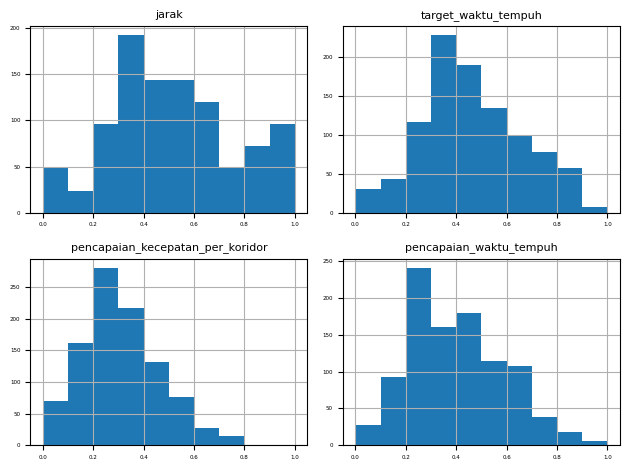

In [8]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler()

X_normalized = mmscaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=1)

X_normalized_df = pd.DataFrame(X_normalized, columns=['jarak', 'target_waktu_tempuh', 'pencapaian_kecepatan_per_koridor', 'pencapaian_waktu_tempuh'])

fig = X_normalized_df.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(8) for x in fig.ravel()]
plt.tight_layout()

model.fit(X_train, y_train)
y_pred=model.predict(X_test)

cross_val_scores_normalized = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
normalized_mae = -cross_val_scores_normalized.mean()
print("MinMaxScaler MAE:", normalized_mae)

Dengan X yang sama namun bedanya menggunakan StandardScaler pada X nya dan menampilkan distribusi data dari setiap fitur X serta menghitung akurasi dari model regresi linear menggunakan Mean Absolute Error.

StandardScaler MAE: 1.9821339415911232


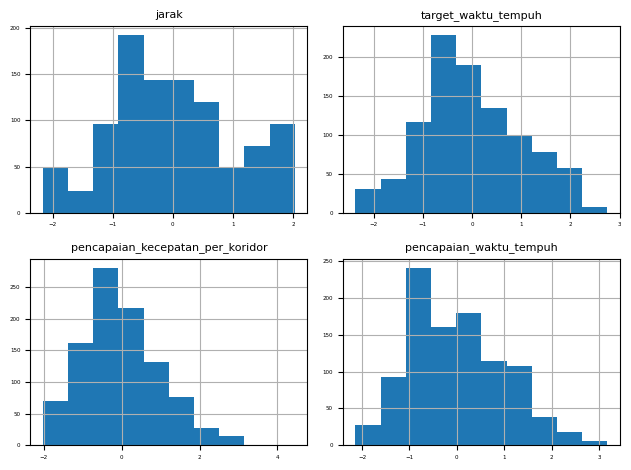

In [9]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

X_standard = standard_scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size=0.2, random_state=1)

X_standard_df = pd.DataFrame(X_standard, columns=['jarak', 'target_waktu_tempuh', 'pencapaian_kecepatan_per_koridor', 'pencapaian_waktu_tempuh'])

fig = X_standard_df.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(8) for x in fig.ravel()]
plt.tight_layout()

model.fit(X_train, y_train)
y_pred=model.predict(X_test)

cross_val_scores_standard = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
standard_mae = -cross_val_scores_standard.mean()
print("StandardScaler MAE:", standard_mae)

Dengan X yang sama namun bedanya menggunakan RobustScaler pada X nya dan menampilkan distribusi data dari setiap fitur X serta menghitung akurasi dari model regresi linear menggunakan Mean Absolute Error.

RobustScaler MAE: 1.9821339415911232


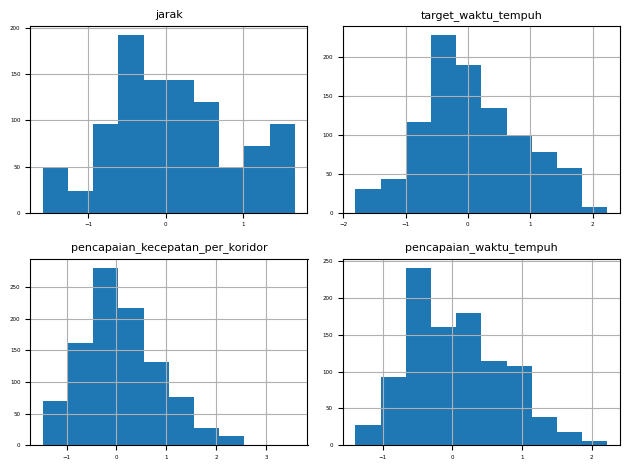

In [10]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

X_robust = robust_scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size=0.2, random_state=1)

X_robust_df = pd.DataFrame(X_robust, columns=['jarak', 'target_waktu_tempuh', 'pencapaian_kecepatan_per_koridor', 'pencapaian_waktu_tempuh'])

fig = X_robust_df.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(8) for x in fig.ravel()]
plt.tight_layout()

model.fit(X_train, y_train)
y_pred=model.predict(X_test)

cross_val_scores_robust = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
robust_mae = -cross_val_scores_robust.mean()
print("RobustScaler MAE:", robust_mae)

## Pengerjaan tugas tiga

Pada tugas ketiga, menghitung akurasi model regresi linear dengan X yang merupakan fitur kategorial pada dataset yaitu kolom "waktu", "arah", dan "koridor".

In [11]:
categorial = dataset[['waktu','arah','koridor']]
categorial

waktu             arah                                            koridor
0    pagi  Selatan - Pusat  Lenteng Agung - Ps. Minggu - Supomo - dr. Saha...
1    pagi  Selatan - Pusat  Cilandak KKO - Warung Buncit - Mampang Prapata...
2    pagi  Selatan - Pusat  Pangeran Antasari - Prapanca - Iskandarsyah - ...
3    pagi  Selatan - Pusat  Pondok Labu - Fatmawati - Panglima Polim - Sis...
4    pagi  Selatan - Pusat  Pasar Jumat - Metro Pondok Indah - Iskandar Mu...
..    ...              ...                                                ...
981  Sore    Pusat - Utara  Letjend. Suprapto - Yos Sudarso - Bollevard Ba...
982  Sore    Pusat - Barat  Hayam Wuruk - Hasyim Ashari - Kyai Tapa - Daan...
983  Sore    Pusat - Barat  Hayam Wuruk - Balikpapan - Tomang Raya - S. Pa...
984  Sore    Pusat - Barat  Kebon Sirih - Jatibaru - Katamso - Kemanggisan...
985  Sore    Pusat - Barat  Kebon Sirih - Jatibaru - Katamso - Kemanggisan...

[986 rows x 3 columns]

In [12]:
categorial = categorial.dropna()

Fitur kategorial tidak bisa digunakan untuk prediksi menggunakan model regresi linear, maka dari itu kita perlu menggunakan OrdinalEncoder atau OneHotEncoder untuk mengubah semua value dari fitur kategorial menjadi numerik.

In [13]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

categorial_ordinal = ordinal_encoder.fit_transform(categorial)

X_train, X_test, y_train, y_test = train_test_split(categorial_ordinal, y, test_size=0.2, random_state=1)

model.fit(X_train, y_train)
y_pred=model.predict(X_test)

cross_val_scores_ordinal = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
ordinal_mae = -cross_val_scores_ordinal.mean()
print("OrdinalEncoder MAE:", ordinal_mae)

OrdinalEncoder MAE: 3.3645379431229245


In [14]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False)

categorial_onehot = onehot_encoder.fit_transform(categorial)

X_train, X_test, y_train, y_test = train_test_split(categorial_onehot, y, test_size=0.2, random_state=1)

model.fit(X_train, y_train)
y_pred=model.predict(X_test)

cross_val_scores_onehot = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
onehot_mae = -cross_val_scores_onehot.mean()
print("OneHotEncoder MAE:", onehot_mae)

OneHotEncoder MAE: 3.188656507702899


## Pengerjaan tugas keempat

Pada tugas keempat, menggunakan kombinasi transformasi data apapun (lebih dari 2) untuk semua fitur. Karena sudah dibuat fitur yang sudah ditransformasi dengan OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler, dan RobustScaler maka hanya perlu menggabungkannya dan hitung akurasi model regresi linear nya. Seperti di bawah ini. 

In [15]:
ordinal_minmax = np.concatenate((categorial_ordinal, X_normalized), axis=1)

X_train, X_test, y_train, y_test = train_test_split(ordinal_minmax, y, test_size=0.2, random_state=1)

model.fit(X_train, y_train)
y_pred=model.predict(X_test)

cross_val_scores_ordinal_minmax = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
ordinal_minmax_mae = -cross_val_scores_ordinal_minmax.mean()
print("OrdinalEncoder + MinMaxScaler MAE:", ordinal_minmax_mae)

OrdinalEncoder + MinMaxScaler MAE: 1.8990023663315814


In [16]:
onehot_minmax = np.concatenate((categorial_onehot, X_normalized), axis=1)

X_train, X_test, y_train, y_test = train_test_split(onehot_minmax, y, test_size=0.2, random_state=1)

model.fit(X_train, y_train)
y_pred=model.predict(X_test)

cross_val_scores_onehot_minmax = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
onehot_minmax_mae = -cross_val_scores_onehot_minmax.mean()
print("OneHotEncoder + MinMaxScaler MAE:", onehot_minmax_mae)

OneHotEncoder + MinMaxScaler MAE: 1.352619003466903


In [17]:
ordinal_standard = np.concatenate((categorial_ordinal, X_standard), axis=1)

X_train, X_test, y_train, y_test = train_test_split(ordinal_standard, y, test_size=0.2, random_state=1)

model.fit(X_train, y_train)
y_pred=model.predict(X_test)

cross_val_scores_ordinal_standard = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
ordinal_standard_mae = -cross_val_scores_ordinal_standard.mean()
print("OrdinalEncoder + StandardScaler MAE:", ordinal_standard_mae)

OrdinalEncoder + StandardScaler MAE: 1.899002366331581


In [18]:
onehot_standard = np.concatenate((categorial_onehot, X_standard), axis=1)

X_train, X_test, y_train, y_test = train_test_split(onehot_standard, y, test_size=0.2, random_state=1)

model.fit(X_train, y_train)
y_pred=model.predict(X_test)

cross_val_scores_onehot_standard = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
onehot_standard_mae = -cross_val_scores_onehot_standard.mean()
print("OneHotEncoder + StandardScaler MAE:", onehot_standard_mae)

OneHotEncoder + StandardScaler MAE: 1.3153097112892924


In [19]:
ordinal_robust = np.concatenate((categorial_ordinal, X_robust), axis=1)

X_train, X_test, y_train, y_test = train_test_split(ordinal_robust, y, test_size=0.2, random_state=1)

model.fit(X_train, y_train)
y_pred=model.predict(X_test)

cross_val_scores_ordinal_robust = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
ordinal_robust_mae = -cross_val_scores_ordinal_robust.mean()
print("OrdinalEncoder + RobustScaler MAE:", ordinal_robust_mae)

OrdinalEncoder + RobustScaler MAE: 1.8990023663315807


In [20]:
onehot_robust = np.concatenate((categorial_onehot, X_robust), axis=1)

X_train, X_test, y_train, y_test = train_test_split(onehot_robust, y, test_size=0.2, random_state=1)

model.fit(X_train, y_train)
y_pred=model.predict(X_test)

cross_val_scores_onehot_robust = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
onehot_robust_mae = -cross_val_scores_onehot_robust.mean()
print("OneHotEncoder + RobustScaler MAE:", onehot_robust_mae)

OneHotEncoder + RobustScaler MAE: 1.3156692079757668


## Pengerjaan tugas kelima

Ini adalah perbandingan akurasi model setiap skenario. 

In [21]:
#Summary
print("Original data MAE:", mae)
print("MinMaxScaler MAE:", normalized_mae)
print("StandardScaler MAE:", standard_mae)
print("RobustScaler MAE:", robust_mae)
print("OrdinalEncoder MAE:", ordinal_mae)
print("OneHotEncoder MAE:", onehot_mae)
print("OrdinalEncoder + MinMaxScaler MAE:", ordinal_minmax_mae)
print("OneHotEncoder + MinMaxScaler MAE:", onehot_minmax_mae)
print("OrdinalEncoder + StandardScaler MAE:", ordinal_standard_mae)
print("OneHotEncoder + StandardScaler MAE:", onehot_standard_mae)
print("OrdinalEncoder + RobustScaler MAE:", ordinal_robust_mae)
print("OneHotEncoder + RobustScaler MAE:", onehot_robust_mae)

Original data MAE: 1.982133941591125
MinMaxScaler MAE: 1.982133941591123
StandardScaler MAE: 1.9821339415911232
RobustScaler MAE: 1.9821339415911232
OrdinalEncoder MAE: 3.3645379431229245
OneHotEncoder MAE: 3.188656507702899
OrdinalEncoder + MinMaxScaler MAE: 1.8990023663315814
OneHotEncoder + MinMaxScaler MAE: 1.352619003466903
OrdinalEncoder + StandardScaler MAE: 1.899002366331581
OneHotEncoder + StandardScaler MAE: 1.3153097112892924
OrdinalEncoder + RobustScaler MAE: 1.8990023663315807
OneHotEncoder + RobustScaler MAE: 1.3156692079757668


## Kesimpulan

Dari dataset diatas, menggunakan OneHotEncoder + StandardScaler adalah metode transformasi data yang terbaik. MAE nya merupakan yang terkecil dibandingkan semua skenario. Namun, tidak menutup kemungkinan skenario yang lain merupakan metode transformasi data yang terbaik. Hanya untuk kasus ini saja, OneHotEncoder + StandardScaler merupakan yang terbaik untuk dilakukan.

Jika dilihat dari distribusi data pada fitur numerik yang dilakukan dengan transformasi data MinMaxScaler, StandardScaler, dan RobustScaler, tidak ada perbedaan yang signifikan dari distribusi data nya. Begitu juga dengan akurasi model regresi linear nya. Ketiga transformasi data ini tidak memberikan perbedaan akurasi model regresi linear yang signifikan dengan akurasi model regresi linear menggunakan original data. Ini mengindikasikan bahwa hanya scaling pada data numerik bukan merupakan cara yang efektif. Sama juga dengan menggunakan encoder pada fitur kategorial. Bahkan akurasi model regresi linear hanya dengan encoding pada fitur kategorial lebih buruk daripada original data.

Dengan menggabungkan encoding fitur kategorial dan scaling fitur numerik, dapat membuat model regresi linear menjadi lebih baik.